# 機械学習　第８章　実習問題（回帰）

## 問題文に従って各問題ごとにセルを複数追加してプログラムを実装してください。

## ※ 準備作業
### ▶ 以下を実施してください。

In [625]:
# ドライブのマウント
# ディレクトリの作成
# ディレクトリへの移動
# house_rent.csv のアップロード

## ※ matplotlib日本語化のためのライブラリのインストール
### ▶ 以下を実行してください。

In [626]:
!pip install japanize-matplotlib

## データ分析対象データ

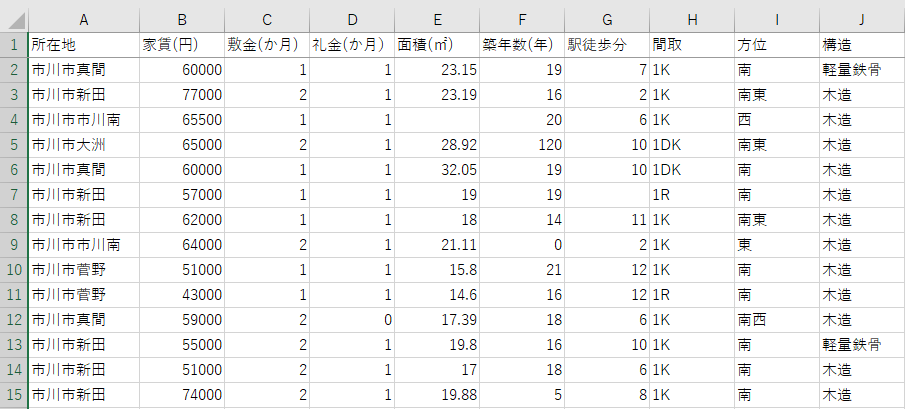

### ■ 正解データ　：　家賃（円）
### ■ 特徴量候補　：　所在地、敷金（か月）、礼金（か月）、面積（㎡）、築年数（年）、駅徒歩、間取、方位、構造

## 問題１　本データのデータ分析において使用する各種ライブラリをインポートしてください。
## また、グラフ表示が同一タブ上に表示されるようにしてください。

In [627]:
# pandasをインポートし、別名 pd とする
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import japanize_matplotlib 

## 問題２　CSVファイル house_rent.csv を読み込んでください。ただし、エンコーディングは cp932 を使用してください。

In [628]:
df = pd.read_csv('./datafiles/house_rent.csv', encoding="cp932")
df

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,1K,南,軽量鉄骨
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,1K,南東,木造
2,市川市市川南,65500,1,1.0,NaN,20.0,6.0,1K,西,木造
3,市川市大洲,65000,2,1.0,28.92,120.0,10.0,1DK,南東,木造
4,市川市真間,60000,1,1.0,32.05,19.0,10.0,1DK,南,木造
...,...,...,...,...,...,...,...,...,...,...
299,市川市新田,64000,2,1.0,22.01,NaN,5.0,1R,南,木造
300,市川市新田,52000,1,0.0,18.02,25.0,13.0,1K,南東,軽量鉄骨
301,市川市新田,57000,1,1.0,21.70,20.0,10.0,1K,南,木造
302,市川市真間,60000,1,1.0,20.37,13.0,14.0,1K,西,鉄骨造


## 問題３　読み込んだCSVファイルの先頭５行と末尾５行を表示してください。

In [629]:
pd.concat([df.head(5), df.tail(5)])

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,1K,南,軽量鉄骨
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,1K,南東,木造
2,市川市市川南,65500,1,1.0,NaN,20.0,6.0,1K,西,木造
3,市川市大洲,65000,2,1.0,28.92,120.0,10.0,1DK,南東,木造
4,市川市真間,60000,1,1.0,32.05,19.0,10.0,1DK,南,木造
299,市川市新田,64000,2,1.0,22.01,NaN,5.0,1R,南,木造
300,市川市新田,52000,1,0.0,18.02,25.0,13.0,1K,南東,軽量鉄骨
301,市川市新田,57000,1,1.0,21.70,20.0,10.0,1K,南,木造
302,市川市真間,60000,1,1.0,20.37,13.0,14.0,1K,西,鉄骨造
303,市川市新田,72000,2,1.0,20.70,0.0,2.0,1K,東,鉄骨造


## 問題４　質的データの列をすべて挙げてください。つぎに、それらの列にデータが何種類あるかを調べて表示してください。

In [630]:
Q_COL_NAMES = ['所在地', '間取', '方位', '構造'];
for name in Q_COL_NAMES:
  print(df[name].value_counts())

市川市新田     104
市川市市川南     74
市川市真間      42
市川市大洲      30
市川市市川      26
市川市菅野      20
市川市須和田      3
市川市平田       3
市川市大町       1
市川市大和田      1
Name: 所在地, dtype: int64
1K     229
1R      44
1DK     31
Name: 間取, dtype: int64
南     167
南東     48
東      30
西      26
南西     26
北東      4
北       3
Name: 方位, dtype: int64
木造      249
軽量鉄骨     44
鉄骨造      10
Name: 構造, dtype: int64


## 問題５　質的データをすべてダミー化してデータ分析させるデータフレームを作成して下さい。次に、作成したデータフレームの先頭５行を表示してください。

In [631]:
# '所在地', '間取', '方位', '構造'をダミー化
q = pd.get_dummies(df[Q_COL_NAMES], drop_first=False)
df3 = pd.concat([df, q], axis=1)
df3 = df3.drop(Q_COL_NAMES, axis=1)
df3.head(5)

# ダミー化したデータ
#location = pd.get_dummies(df['所在地'], drop_first=False)
#floorplan = pd.get_dummies(df['間取'], drop_first=False)
#direction = pd.get_dummies(df['方位'], drop_first=False)
#structure = pd.get_dummies(df['構造'], drop_first=False)

# dfとダミー変数列を連結
#df3 = pd.concat([df, location, deposit, floorplan, direction, structure], axis=1)
#df3 = df3.drop(['所在地', '間取', '方位', '構造'], axis=1)
#df3.head(5)

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,...,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造
0,60000,1,1.0,23.15,19.0,7.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,77000,2,1.0,23.19,16.0,2.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,65500,1,1.0,NaN,20.0,6.0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,65000,2,1.0,28.92,120.0,10.0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,60000,1,1.0,32.05,19.0,10.0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


## 問題６　問題５で作成したデータフレームにおいて、訓練データ、検証データ、テストデータに分割してください。
### ただし、訓練データとテストデータの比率は８：２、乱数シードは０とします。

In [632]:
# 訓練データ&検証データとテストデータに分割
train_val, test = train_test_split(df3, test_size = 0.2, random_state = 0)

## 問題７　訓練データにおいて、欠損値を確認して表示し、平均値で穴埋めしてください。欠損値処理した訓練データの先頭５行を表示してください。

In [633]:
# 欠損値の確認
train_val.isnull().sum()
# 平均値で穴埋め
train_val2 = train_val.fillna(train_val.median())
train_val2.head(5)

,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,所在地_市川市大和田,所在地_市川市大洲,所在地_市川市大町,所在地_市川市市川,...,方位_北,方位_北東,方位_南,方位_南東,方位_南西,方位_東,方位_西,構造_木造,構造_軽量鉄骨,構造_鉄骨造
176,69000,2,1.0,19.87,1.0,2.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
26,70000,2,2.0,31.53,28.0,8.0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
74,65000,2,1.0,28.92,12.0,10.0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
101,51000,1,1.0,20.50,20.0,2.0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
154,72000,2,1.0,20.70,0.0,2.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


## 問題８　外れ値処理をしてください。
### ただし、処理過程を説明できるようにセルを構成してください。

/Users/k.yoshi/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


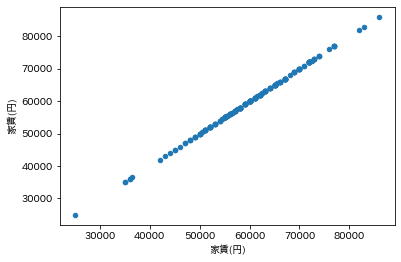

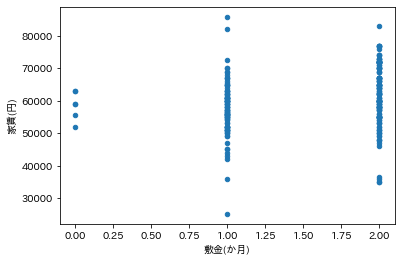

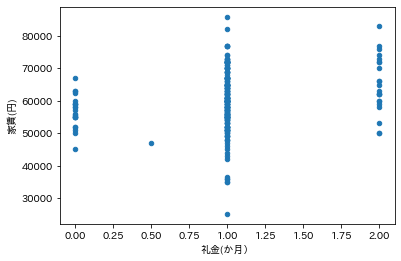

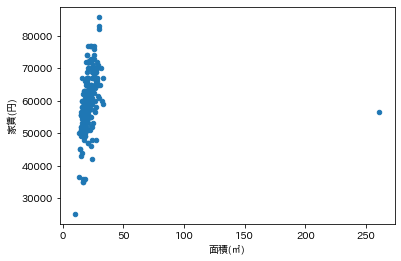

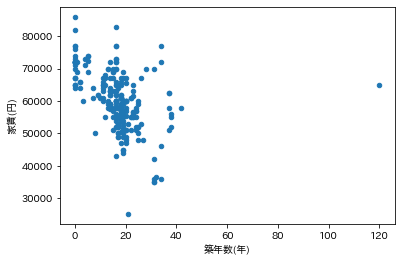

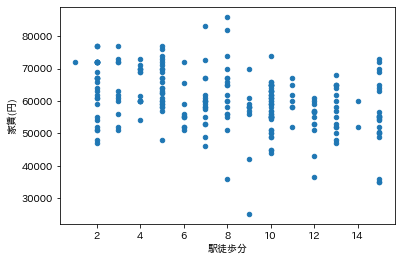

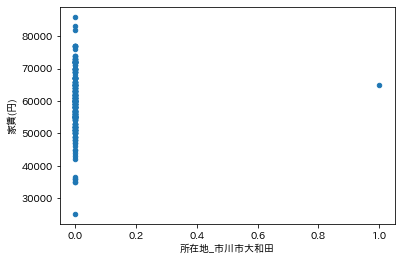

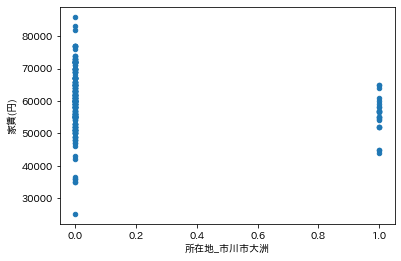

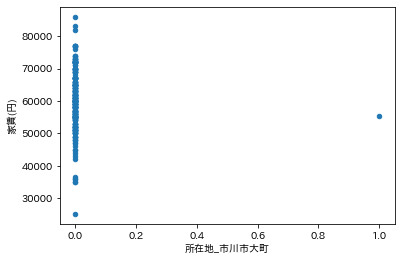

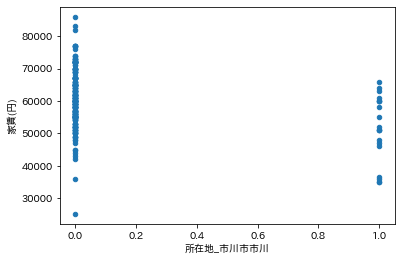

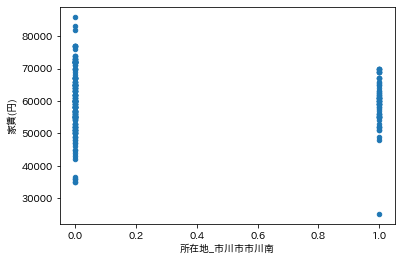

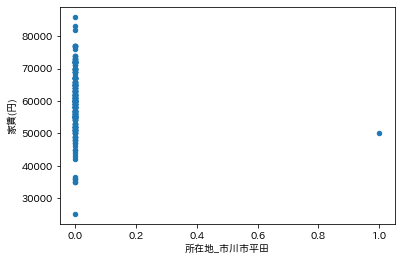

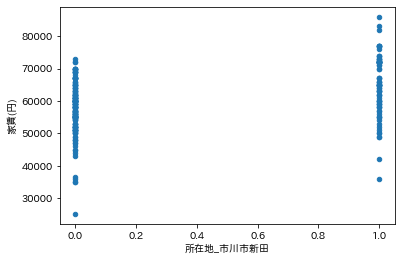

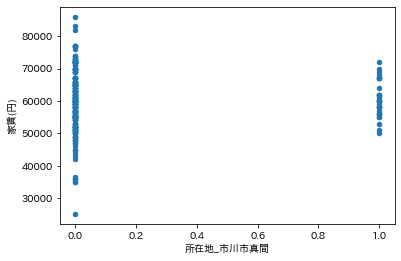

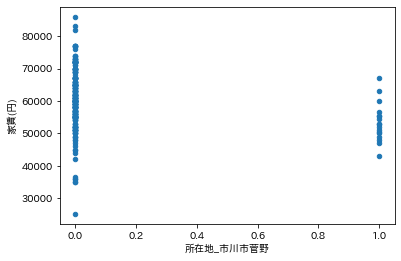

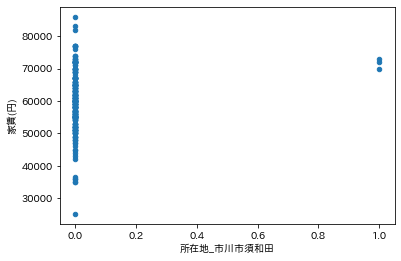

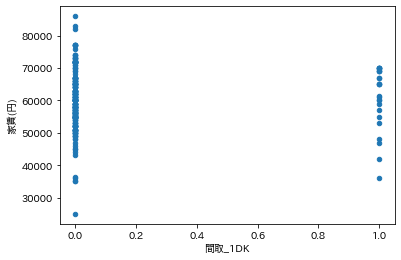

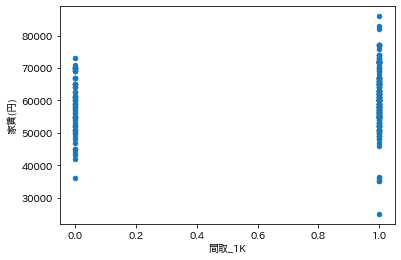

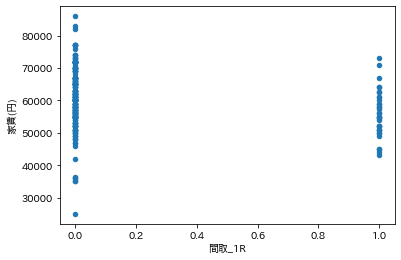

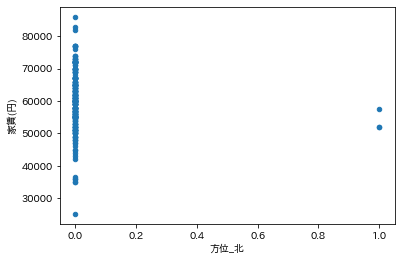

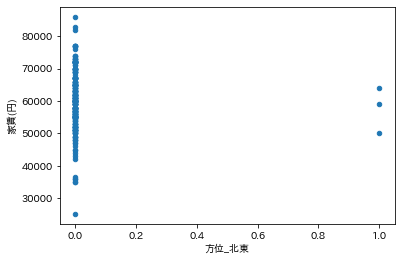

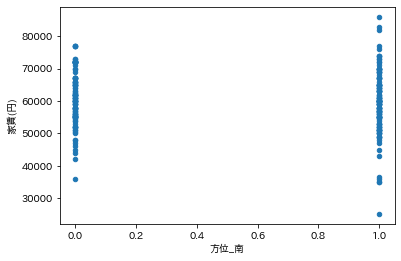

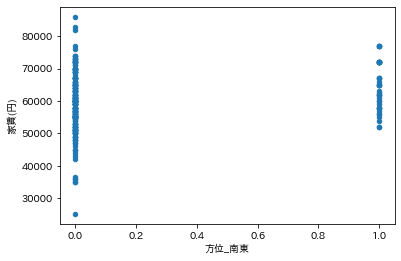

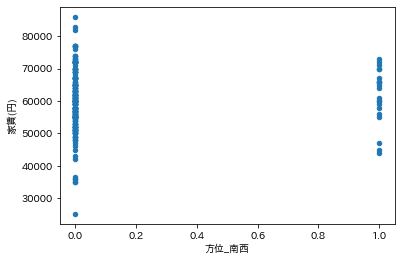

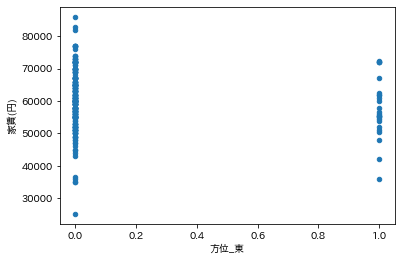

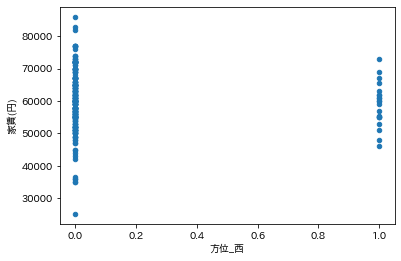

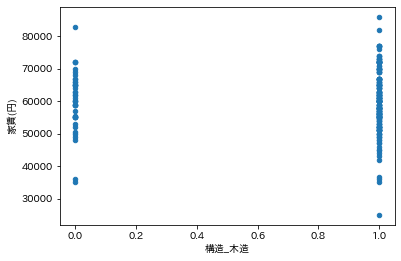

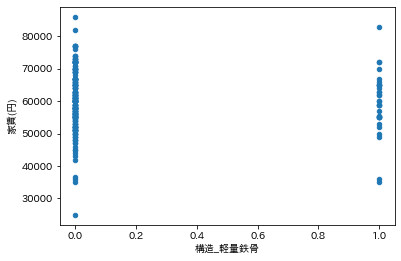

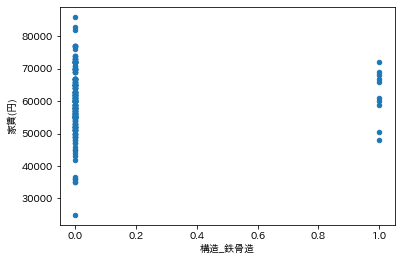

In [634]:
for name in train_val2.columns:
  train_val2.plot(kind='scatter', x=name, y='家賃(円)')

In [635]:
train_val2 = train_val2.drop(train_val2[train_val2['面積(㎡)'] > 200].index, axis=0)
train_val2 = train_val2.drop(train_val2[train_val2['家賃(円)'] < 30000].index, axis=0)
train_val2 = train_val2.drop(train_val2[train_val2['築年数(年)'] > 100].index, axis=0)


## 問題９　外れ値処理の結果を表示してください。

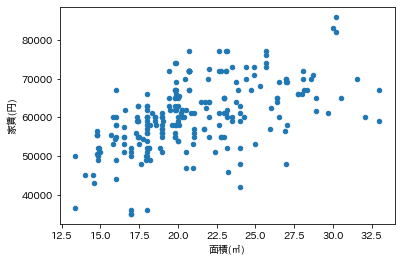

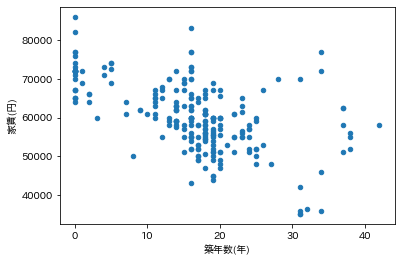

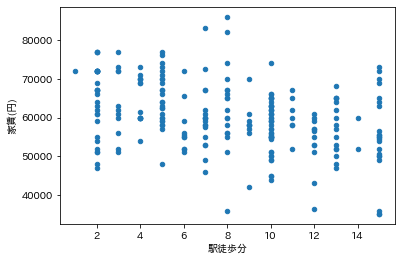

In [636]:
for col2_name in ['面積(㎡)','築年数(年)','駅徒歩分']:
  train_val2.plot(kind = 'scatter',x = col2_name,y = '家賃(円)')

## 問題１０　正解データと各特徴量の相関関係を説明できるように表示してください。

In [637]:
#家賃との相関係数→絶対値→DESCにソート
train_val2.corr()['家賃(円)'].map(abs).sort_values(ascending=False)


家賃(円)         1.000000
築年数(年)        0.565288
面積(㎡)         0.535929
所在地_市川市新田     0.381552
駅徒歩分          0.374368
所在地_市川市市川     0.296395
所在地_市川市菅野     0.218603
礼金(か月）        0.214645
敷金(か月)        0.210300
間取_1R         0.208472
方位_南東         0.205315
所在地_市川市大洲     0.184718
間取_1K         0.157105
所在地_市川市須和田    0.146336
方位_東          0.102472
方位_北          0.084013
所在地_市川市平田     0.076769
方位_南          0.061558
方位_西          0.049243
方位_南西         0.047253
構造_鉄骨造        0.040995
構造_軽量鉄骨       0.038390
所在地_市川市大町     0.035924
所在地_市川市大和田    0.034625
方位_北東         0.034498
間取_1DK        0.019772
構造_木造         0.013113
所在地_市川市真間     0.012311
所在地_市川市市川南    0.010534
Name: 家賃(円), dtype: float64

## 問題１１　正解データと特徴量を抽出し、それぞれの先頭５行を表示してください。

In [638]:
# 正解データを取り出す
t = train_val2['家賃(円)']

# 特徴量を取り出す
x = train_val2[['面積(㎡)','築年数(年)','駅徒歩分']]

# 正解量、特徴量の先頭の５行を表示
pd.concat([t.head(5), x.head(5)], axis=1)


,家賃(円),面積(㎡),築年数(年),駅徒歩分
176,69000,19.87,1.0,2.0
26,70000,31.53,28.0,8.0
74,65000,28.92,12.0,10.0
101,51000,20.50,20.0,2.0
154,72000,20.70,0.0,2.0


## 問題１２　問題１１で抽出した正解データと特徴量を使用して、訓練データと検証データに分割してください。
### ただし、訓練データと検証データの比率は８：２、乱数シードは０とします。

In [639]:
# 訓練データと検証データに分割
x_train,x_val,y_train,y_val = train_test_split(x,t,test_size = 0.2,random_state = 0)

## 問題１３　線形重回帰モデルを使用して学習さて、検証データで決定係数を求めて表示してください。

In [640]:
# 重回帰モデルを作成
model = LinearRegression()
# 学習 決定係数
model.fit(x_train, y_train).score(x_val, y_val)

0.5313994495784111

## 問題１４　問題１３で学習したモデルを使用して以下のデータを使用して家賃がいくらになるか予測させてください。
### 予測させるデータは以下の通りです。
#### 敷金：１か月
#### 礼金；１か月
#### 面積：３０㎡
#### 築年数：３年
#### 駅徒歩分：１０分
#### 所在地：市川市新田
#### 間取：１DK
#### 方位：南向き
#### 構造：鉄骨造


In [641]:
# 予測
# [1,30,1.0,3,10,'市川市新田','1DK','南','鉄骨造']
model.predict([[3, 30, 10]])


array([34777.68180905])

## 問題１５　特徴量エンジニアリングで訓練データと検証データの決定係数が特徴量エンジニアリングを行う前より良くなるようにしてください。
### ただし、特徴量エンジニアリングの過程が理解できるようにセルを構成してください。

In [642]:
#家賃との相関係数→絶対値→DESCにソート
train_val2.corr()['家賃(円)'].map(abs).sort_values(ascending=False).head(10)

家賃(円)        1.000000
築年数(年)       0.565288
面積(㎡)        0.535929
所在地_市川市新田    0.381552
駅徒歩分         0.374368
所在地_市川市市川    0.296395
所在地_市川市菅野    0.218603
礼金(か月）       0.214645
敷金(か月)       0.210300
間取_1R        0.208472
Name: 家賃(円), dtype: float64

In [643]:
# learn関数の定義
def learn(x,t):
  # 訓練データと検証データに分割　8:2
  x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=0)

  model = LinearRegression()
  # 訓練データで学習 
  model.fit(x_train, y_train)
  # 訓練データの決定係数
  train_score = model.score(x_train, y_train)
  # 検証データの決定係数
  test_score = model.score(x_test, y_test)

  return train_score, test_score

In [644]:
# 特徴量
x = train_val2.loc[ : , '敷金(か月)':'構造_鉄骨造']
# 正解データ
t = train_val2['家賃(円)']

# チューニング 多項式
x['面積(㎡)2'] = x['面積(㎡)'] ** 2
x['築年数(年)2'] = x['築年数(年)'] ** 2
x['駅徒歩分'] = x['駅徒歩分'] ** 2



## 問題１６　チューニング結果を受けて、データの標準化後再学習をしてください。

In [645]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 特徴量を標準化
sc_model_x = StandardScaler()
sc_model_x.fit(x)
sc_x = sc_model_x.transform(x)

# 2次元配列に変換
t = np.array(t).reshape(-1,1)

# 正解データを標準化
sc_model_t = StandardScaler()
sc_model_t.fit(t)
sc_t = sc_model_t.transform(t)

# 標準化後データで学習→決定係数
model2 = LinearRegression()
model2.fit(sc_x, sc_t).score(sc_x, sc_t)


0.7037907758272164

## 問題１７　テストデータを使用してモデルを評価してください。
## ただし、決定係数の値が 0.65 以上となるようにしてください。

In [646]:
test.isnull().sum()

家賃(円)         0
敷金(か月)        0
礼金(か月）        0
面積(㎡)         0
築年数(年)        0
駅徒歩分          2
所在地_市川市大和田    0
所在地_市川市大洲     0
所在地_市川市大町     0
所在地_市川市市川     0
所在地_市川市市川南    0
所在地_市川市平田     0
所在地_市川市新田     0
所在地_市川市真間     0
所在地_市川市菅野     0
所在地_市川市須和田    0
間取_1DK        0
間取_1K         0
間取_1R         0
方位_北          0
方位_北東         0
方位_南          0
方位_南東         0
方位_南西         0
方位_東          0
方位_西          0
構造_木造         0
構造_軽量鉄骨       0
構造_鉄骨造        0
dtype: int64

In [647]:
#欠損値処理 - 平均値で穴埋め
test2 = test.fillna(train_val.median())
#確認
test2.isnull().sum()

家賃(円)         0
敷金(か月)        0
礼金(か月）        0
面積(㎡)         0
築年数(年)        0
駅徒歩分          0
所在地_市川市大和田    0
所在地_市川市大洲     0
所在地_市川市大町     0
所在地_市川市市川     0
所在地_市川市市川南    0
所在地_市川市平田     0
所在地_市川市新田     0
所在地_市川市真間     0
所在地_市川市菅野     0
所在地_市川市須和田    0
間取_1DK        0
間取_1K         0
間取_1R         0
方位_北          0
方位_北東         0
方位_南          0
方位_南東         0
方位_南西         0
方位_東          0
方位_西          0
構造_木造         0
構造_軽量鉄骨       0
構造_鉄骨造        0
dtype: int64

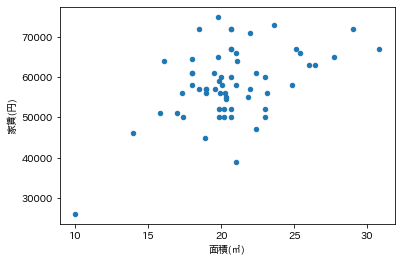

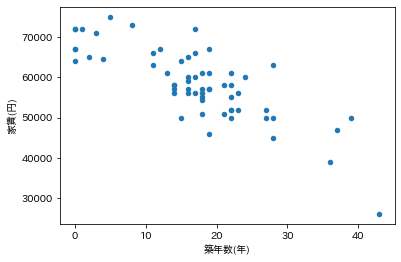

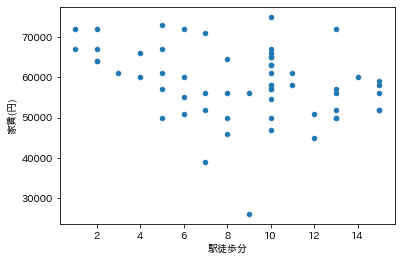

In [648]:
for name in ['面積(㎡)','築年数(年)','駅徒歩分']:
  test.plot(kind='scatter', x=name, y='家賃(円)')

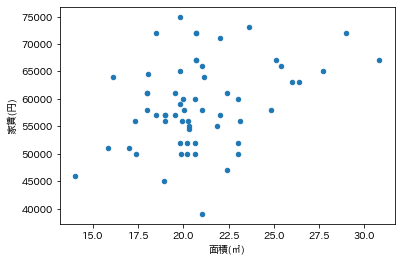

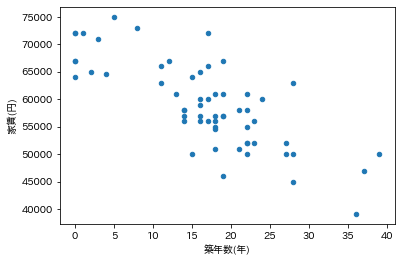

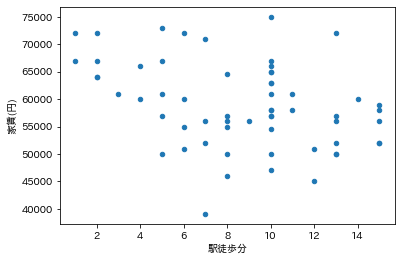

In [649]:
#外れ値を除外
test2 = test2.drop(test2[(test2['家賃(円)'] < 30000) & ( test2['面積(㎡)'] < 12)].index, axis=0)
test2 = test2.drop(test2[(test2['家賃(円)'] < 30000) & ( test2['築年数(年)'] > 40)].index, axis=0)
test2 = test2.drop(test2[(test2['家賃(円)'] < 30000) & ( test2['駅徒歩分'] > 8)].index, axis=0)

for name in ['面積(㎡)','築年数(年)','駅徒歩分']:
  test2.plot(kind='scatter', x=name, y='家賃(円)')

In [650]:
#特徴量 
test_x = test2[['面積(㎡)','築年数(年)','駅徒歩分']]
test_t = test2[['家賃(円)']]

test_x['面積(㎡)2'] = test_x['面積(㎡)'] ** 2
test_x['築年数(年)2'] = test_x['築年数(年)'] ** 2
test_x['駅徒歩分'] = test_x['駅徒歩分'] ** 2

test_x.head(5)

/var/folders/3k/lhstm_sd5j3fb1zw18ps3t700000gn/T/ipykernel_58938/4159518917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['面積(㎡)2'] = test_x['面積(㎡)'] ** 2
/var/folders/3k/lhstm_sd5j3fb1zw18ps3t700000gn/T/ipykernel_58938/4159518917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['築年数(年)2'] = test_x['築年数(年)'] ** 2
/var/folders/3k/lhstm_sd5j3fb1zw18ps3t700000gn/T/ipykernel_58938/4159518917.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,面積(㎡),築年数(年),駅徒歩分,面積(㎡)2,築年数(年)2
66,18.04,4.0,64.0,325.4416,16.0
156,20.00,16.0,16.0,400.0000,256.0
247,18.00,19.0,100.0,324.0000,361.0
267,20.03,14.0,225.0,401.2009,196.0
145,20.66,22.0,64.0,426.8356,484.0


In [651]:
# 特徴量を標準化
sc_model_x = StandardScaler()
sc_model_x.fit(test_x)
sc_x = sc_model_x.transform(test_x)

# 2次元配列に変換
test_t = np.array(test_t).reshape(-1,1)

# 正解データを標準化
sc_model_t = StandardScaler()
sc_model_t.fit(test_t)
sc_t = sc_model_t.transform(test_t)

# 標準化後データで学習→決定係数
model2 = LinearRegression()
model2.fit(sc_x, sc_t).score(sc_x, sc_t)


0.7315075553097524

In [652]:
# 予測
# [1,30,1.0,3,10,'市川市新田','1DK','南','鉄骨造']
model2.predict([[3, 30, 10]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 3)

## 問題１８　モデルとStandardScalerオブジェクトを保存してください。
### ただし、モデルは house_rent.pkl、StandardScalerオブジェクトは house_rent_scx と house_rent_scy とします。

In [ ]:
# pickle をインポート
import pickle

with open('house_rent.pkl', 'wb') as f:
  pickle.dump(model2, f)

with open('house_rent_scx', 'wb') as f:
  pickle.dump('sc_model_x', f)

with open('house_rent_scy', 'wb') as f:
  pickle.dump('sc_model_t', f)
